In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as T
from PIL import Image

import numpy as np
import pandas as pd

from glob import glob
import os
import sys
from tqdm.auto import tqdm

from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [3]:
base_path = "../data"
train_path = os.path.join(base_path, "train_dataset")
train_super = glob(os.path.join(train_path, "*"))
train_super

['../data/train_dataset/LT', '../data/train_dataset/BC']

### BC 폴더 관찰하기

In [9]:
bc1_imgs = glob(os.path.join(train_super[-1] + "/BC_01", "*"))
bc1_imgs.sort()
bc1_imgs[:5], bc1_imgs[-5:], len(bc1_imgs)

(['../data/train_dataset/BC/BC_01/DAT01.png',
  '../data/train_dataset/BC/BC_01/DAT02.png',
  '../data/train_dataset/BC/BC_01/DAT03.png',
  '../data/train_dataset/BC/BC_01/DAT04.png',
  '../data/train_dataset/BC/BC_01/DAT05.png'],
 ['../data/train_dataset/BC/BC_01/DAT36.png',
  '../data/train_dataset/BC/BC_01/DAT37.png',
  '../data/train_dataset/BC/BC_01/DAT38.png',
  '../data/train_dataset/BC/BC_01/DAT39.png',
  '../data/train_dataset/BC/BC_01/DAT40.png'],
 39)

In [18]:
def show_images(img_path : str, row : int = 6, col : int = 6) -> None:
    fig, axes = plt.subplots(row, col, figsize=(20,20), dpi=150)
    for i in range(row):
        for j in range(col):
            img = Image.open(img_path[i*col+j])
            img = T.Resize((224, 224))(img)
            axes[i][j].imshow(img)
            axes[i][j].axis("off")
    title = img_path[0].split("/")[-2]
    fig.suptitle(title)
    fig.show()

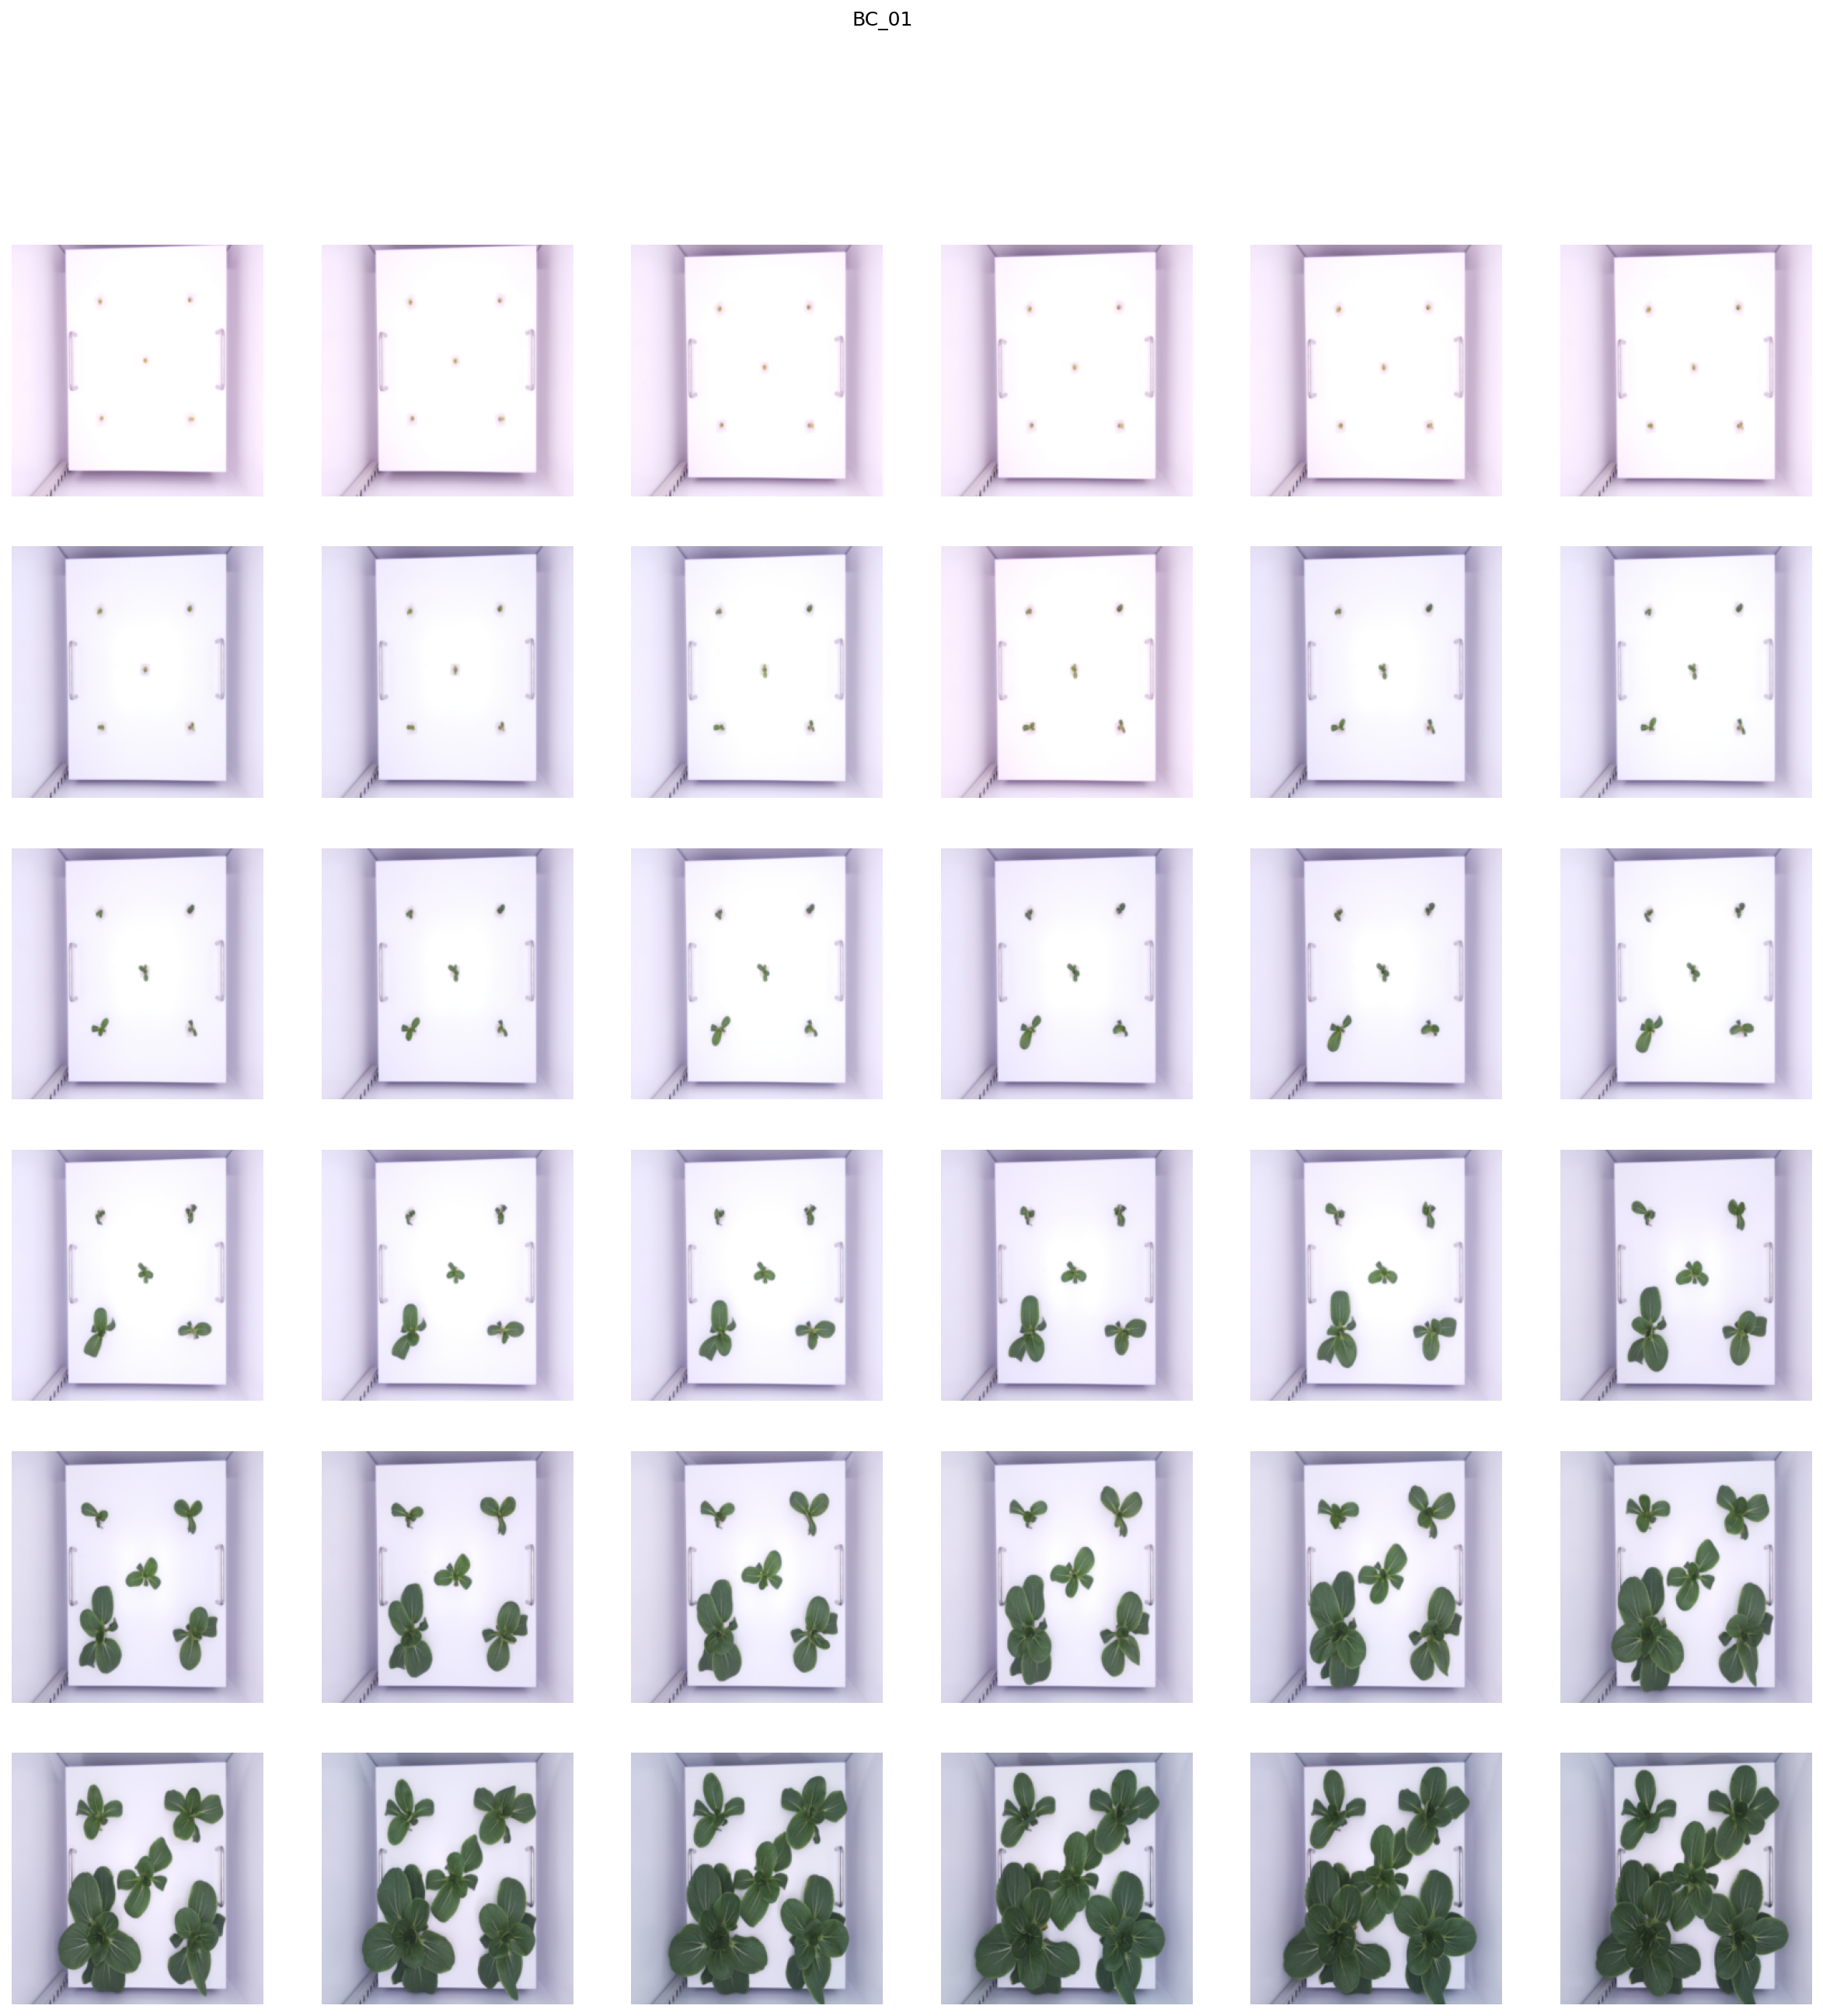

In [20]:
show_images(img_path=bc1_imgs, row=6, col=6)

### LT 폴더 관찰하기

In [21]:
lt1_imgs = glob(os.path.join(train_super[0] + "/LT_01", "*"))
lt1_imgs.sort()
lt1_imgs[:5], lt1_imgs[-5:], len(lt1_imgs)

(['../data/train_dataset/LT/LT_01/DAT00.png',
  '../data/train_dataset/LT/LT_01/DAT01.png',
  '../data/train_dataset/LT/LT_01/DAT02.png',
  '../data/train_dataset/LT/LT_01/DAT03.png',
  '../data/train_dataset/LT/LT_01/DAT04.png'],
 ['../data/train_dataset/LT/LT_01/DAT35.png',
  '../data/train_dataset/LT/LT_01/DAT36.png',
  '../data/train_dataset/LT/LT_01/DAT37.png',
  '../data/train_dataset/LT/LT_01/DAT38.png',
  '../data/train_dataset/LT/LT_01/DAT39.png'],
 40)

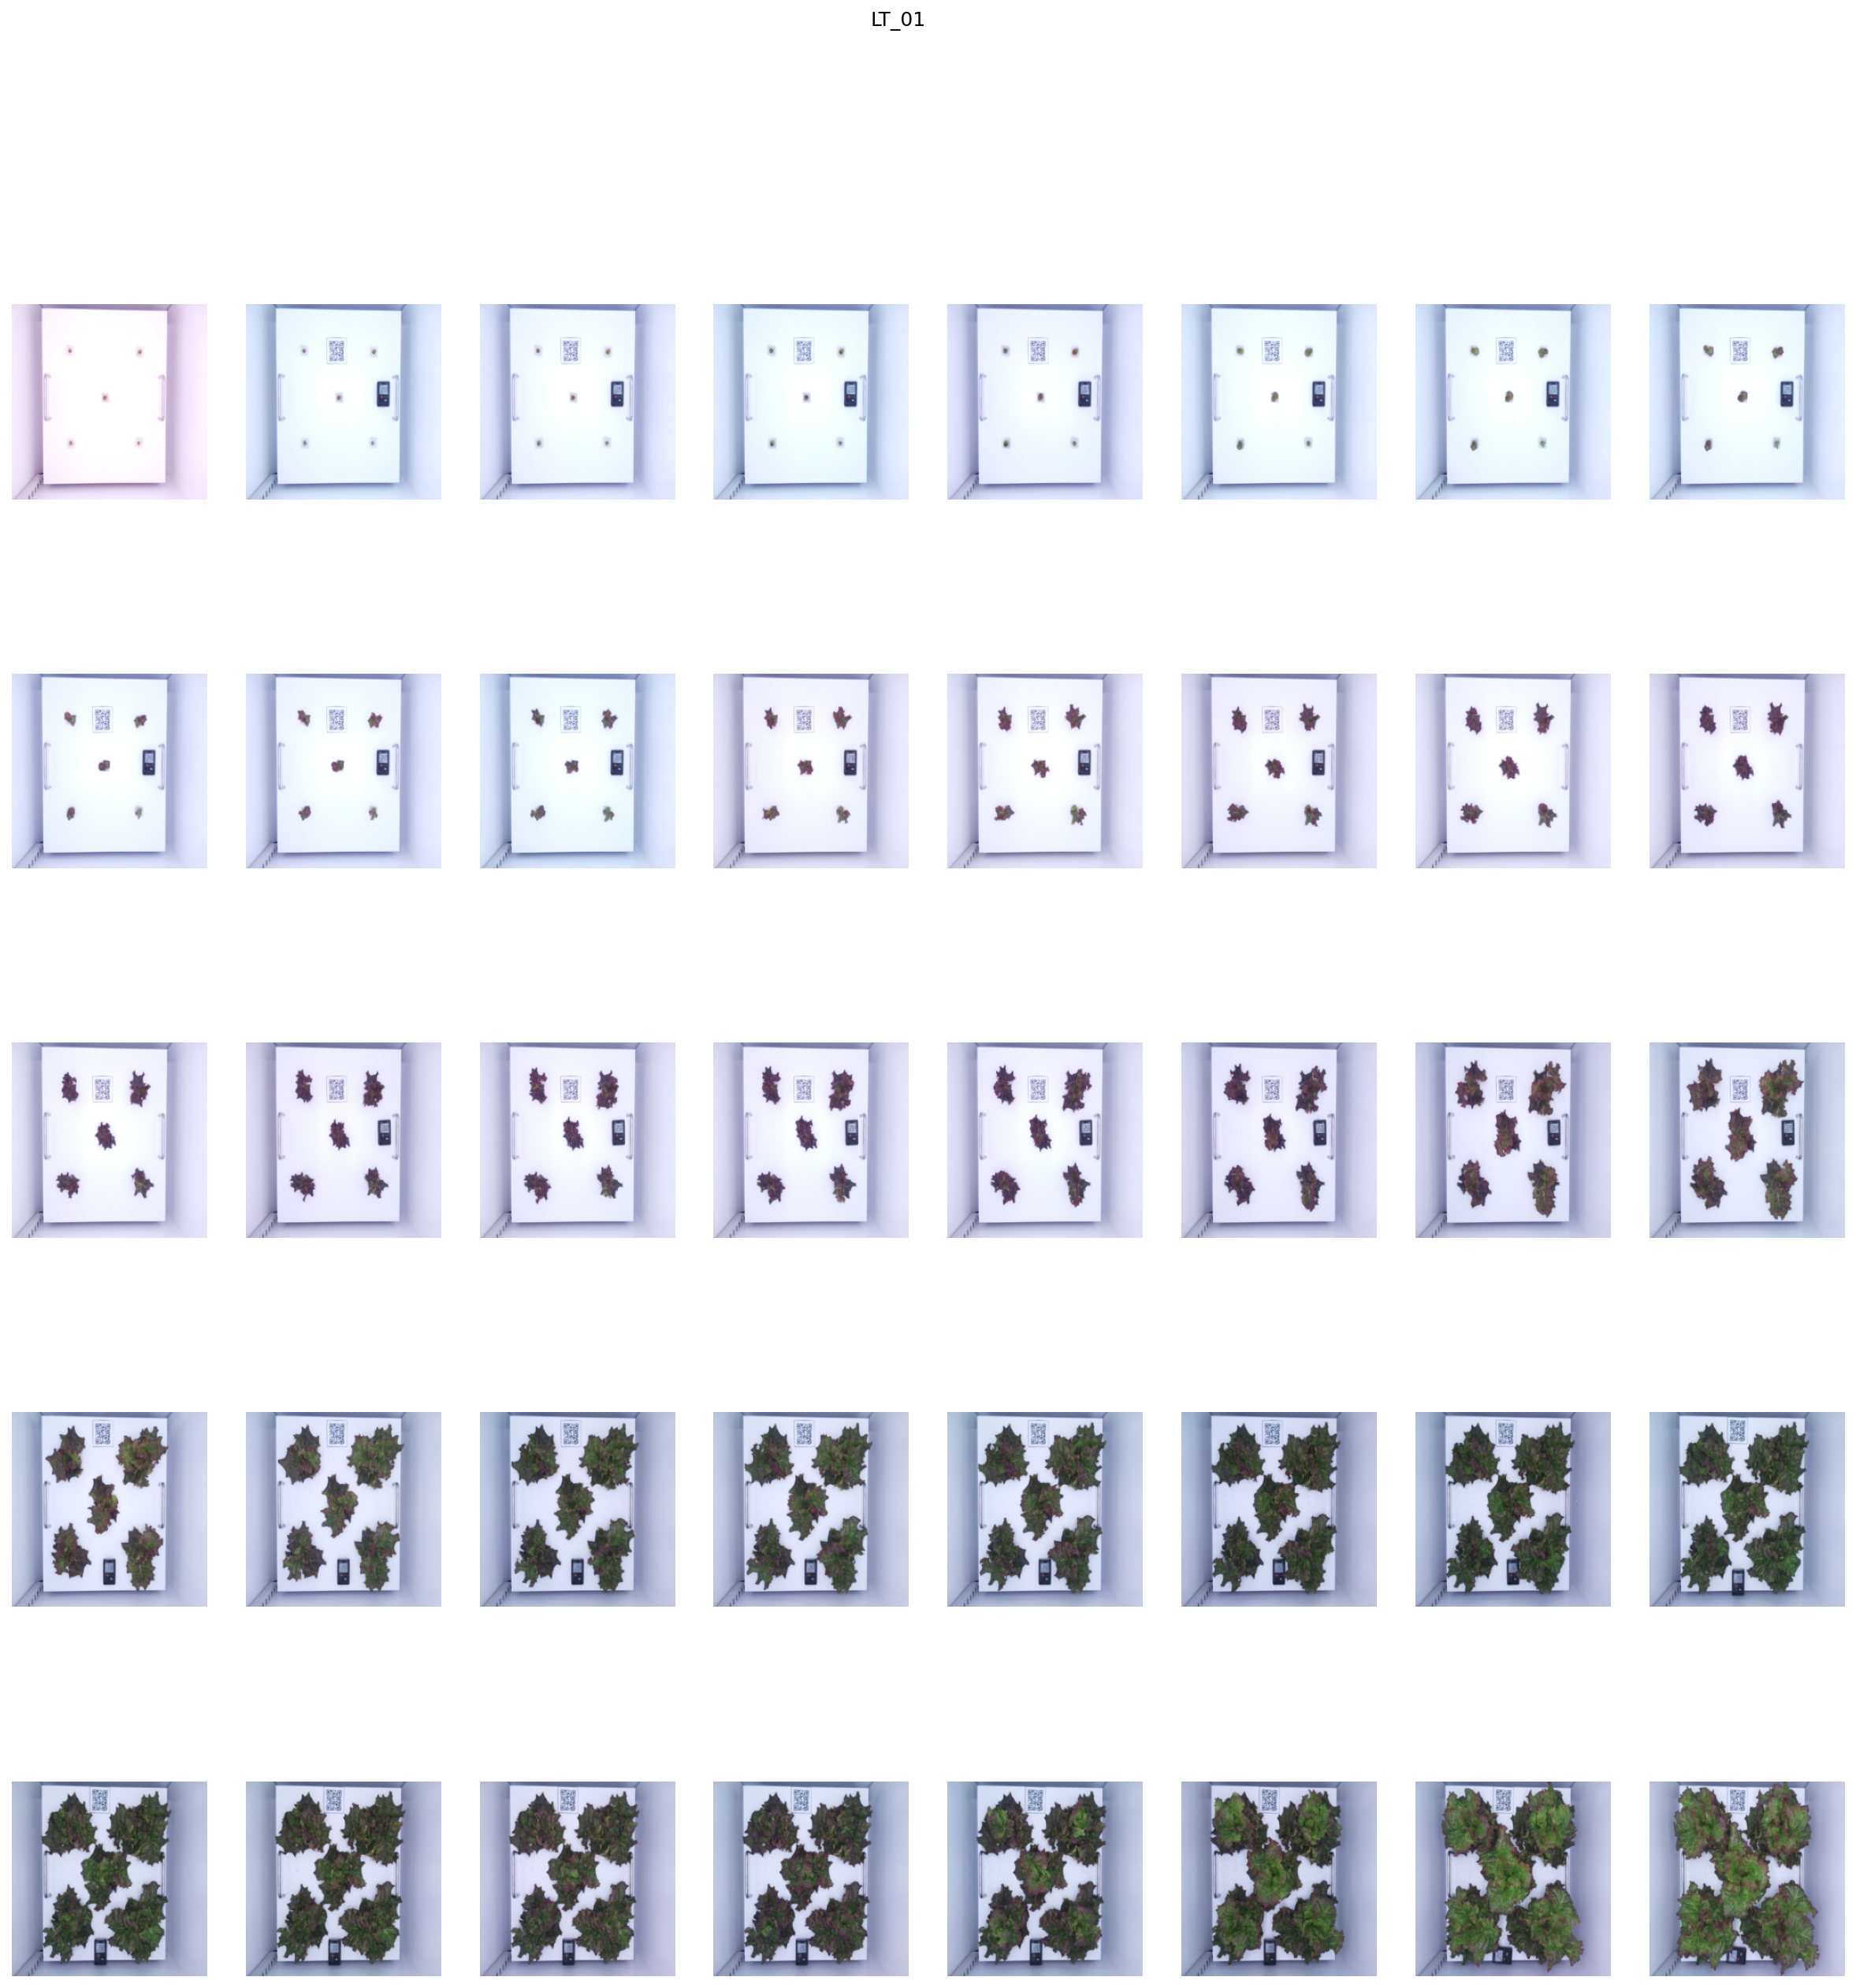

In [22]:
show_images(img_path=lt1_imgs, row=5, col=8)

In [26]:
img = Image.open(lt1_imgs[0])
img.size

(3280, 2464)

### Resizing Image to (224, 224)

In [46]:
from torchvision.utils import save_image

# BC, LT
for super_dir in train_super:
    # BC_01, LT_01
    sub_super = glob(os.path.join(super_dir, "*"))
    for sub_dir in tqdm(sub_super):
        images = glob(os.path.join(sub_dir, "*"))
        # DAT01.png
        for image in images:
            im = Image.open(image)
            im = T.Compose([
                T.Resize((224, 224)),
                T.ToTensor(),
            ])(im)
            save_image(im, image)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

In [48]:
img = Image.open("../data/train_dataset/BC/BC_01/DAT01.png")
img, img.size

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FC31CA23B90>,
 (224, 224))